In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [83]:
tires = {"hoosier_LCO_16x6.0-10_10x7":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
slip_ratio = 0
run_num = 1
normalized_CS = True

In [84]:
def lateral_fit(data, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V

In [85]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["slip"] == slip_angle) & (df["camber"] == camber)]
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["SR"] < 1) & (df["SR"] > -1) & (df["camber"] == camber) & (df["SA"] < 10.65) & (df["SA"] > 10.6)]

    except:
        print("Error getting lateral data for {0}".format(name))

Error getting long data for hoosier_LCO_16x6.0-10_10x7


In [86]:
tire["lat"].to_csv("10625_SA.csv")

SA = tire["lat"]["SA"]
FZ = tire["lat"]["FZ"]
IA = tire["lat"]["IA"]
FY = tire["lat"]["FY"]
MZ = tire["lat"]["MZ"]

fit = curve_fit(lateral_fit, [FZ, SA, IA], FY, p0 = [0.349, -0.00115, 8.760, 730.300, 1745.322, 0.0139, -0.000277, 1.02025435, 
0.000158, 0.149, -0.1595, 0.0329, 9.153,  0.00001406, 0.0328, 0.00362, -0.0143, -0.0116], maxfev=1000000)

TypeError: The number of func parameters=18 must not exceed the number of data points=10

In [ ]:
coeffs = []

for item in fit[0]:
    coeffs.append(item)

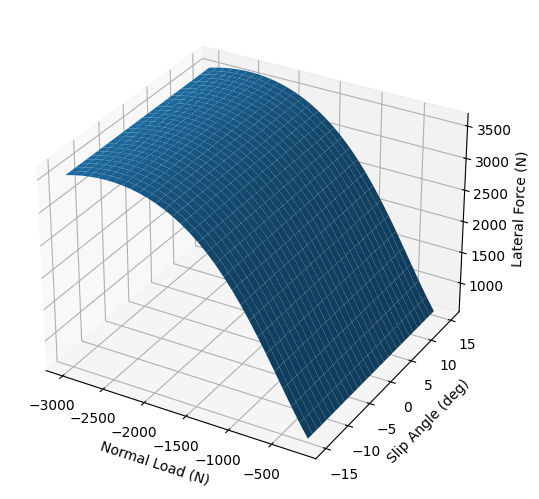

In [ ]:
model_x_data = np.linspace(-3000, -200, 30)
model_y_data = np.linspace(-15, 15, 30)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

for i in [0]:

    W = lateral_fit(np.array([X, Y, i], dtype=object), *coeffs) * -1

    fig.add_axes(ax)
    ax.plot_surface(X, Y, W)
    
ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle (deg)')
ax.set_zlabel('Lateral Force (N)')

plt.show()